# Similarity score comparison

In [1]:
import os
import numpy as np
from matchms.importing import load_from_mgf
import matplotlib.pyplot as plt
import pubchempy
import pandas as pd
from itertools import compress
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
from matchms import calculate_scores
from matchms.similarity import CosineGreedy
from matchms.similarity import ModifiedCosine

In [3]:
import gensim
from spec2vec import Spec2Vec
from matchms.filtering import default_filters
from matchms.filtering import normalize_intensities

In [4]:
path_data = "/Users/krv114/Desktop/MS/Similarity comparison/conference_2023"
file_mgf_reference = os.path.join(path_data, "ex_spectra_stds_NEG_scans_50.mgf")
reference_spectra = list(load_from_mgf(file_mgf_reference))

In [5]:
file_mgf_query = os.path.join(path_data, "pseudo_query_neg_v1.mgf")
query_spectra = list(load_from_mgf(file_mgf_query))

## Cosine similarity

In [6]:
similarity_measure = CosineGreedy(tolerance=0.005)
cosine_scores = calculate_scores(reference_spectra, query_spectra, similarity_measure, is_symmetric=False)

In [7]:
query_spectrum_number = 1392

In [8]:
best_matches = cosine_scores.scores_by_query(query_spectra[query_spectrum_number], sort=True)[:10]
[x[1] for x in best_matches]

[(0.93790317, 3),
 (0.9374978, 3),
 (0.93531649, 3),
 (0.92493718, 3),
 (0.92481331, 2),
 (0.29373256, 1),
 (0.24296568, 1),
 (0.02571729, 1),
 (0.00477169, 1),
 (0.00472724, 1)]

Let's have a look at the percentage of peaks that were matched in the best matches

In [9]:
for i, values in enumerate(
    zip(
        [round(x[1][1] / len(x[0].peaks), 2) * 100 for x in best_matches],
        [round(x[1][1] / len(query_spectra[query_spectrum_number].peaks), 2) * 100 for x in best_matches]
        )):
    print(f'Match #{i+1}: \nRef spectra peaks matched: {values[0]} %\nQuery spectra peaks matched: {values[1]} %')

Match #1: 
Ref spectra peaks matched: 6.0 %
Query spectra peaks matched: 25.0 %
Match #2: 
Ref spectra peaks matched: 6.0 %
Query spectra peaks matched: 25.0 %
Match #3: 
Ref spectra peaks matched: 6.0 %
Query spectra peaks matched: 25.0 %
Match #4: 
Ref spectra peaks matched: 6.0 %
Query spectra peaks matched: 25.0 %
Match #5: 
Ref spectra peaks matched: 4.0 %
Query spectra peaks matched: 17.0 %
Match #6: 
Ref spectra peaks matched: 2.0 %
Query spectra peaks matched: 8.0 %
Match #7: 
Ref spectra peaks matched: 4.0 %
Query spectra peaks matched: 8.0 %
Match #8: 
Ref spectra peaks matched: 2.0 %
Query spectra peaks matched: 8.0 %
Match #9: 
Ref spectra peaks matched: 2.0 %
Query spectra peaks matched: 8.0 %
Match #10: 
Ref spectra peaks matched: 4.0 %
Query spectra peaks matched: 8.0 %


Here we can see the reference spectrum and the corresponding query spectrum

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

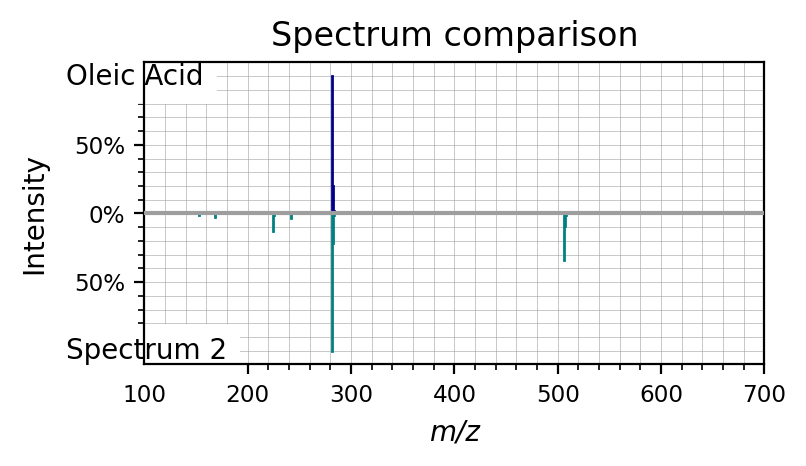

In [10]:
best_matches[0][0].plot_against(query_spectra[query_spectrum_number], label="best match", figsize=(4, 2))

In [11]:
[x[0].get("pccid") for x in best_matches]

['445639',
 '445639',
 '445639',
 '5461071',
 '5461071',
 '5461071',
 '445639',
 '6175',
 '5461001',
 '17904569']

CCCCCCCC/C=C\CCCCCCCC(=O)O


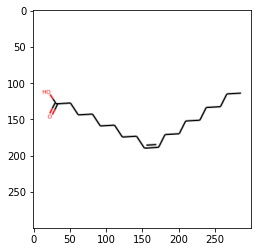

CCCCCCCC/C=C\CCCCCCCC(=O)O


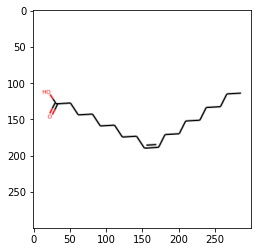

CCCCCCCC/C=C\CCCCCCCC(=O)O


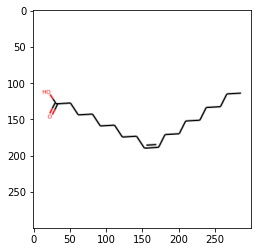

In [12]:
for i, cid in enumerate([x[0].get("pccid") for x in best_matches][:3]):
    smiles = pubchempy.get_compounds(cid, 'cid')[0]
    print(smiles.isomeric_smiles)
    m = Chem.MolFromSmiles(smiles.isomeric_smiles)
    im = Chem.Draw.MolToImage(m)
    plt.imshow(im)
    plt.show()

Text(0.5, 0, 'Query spectrum #ID')

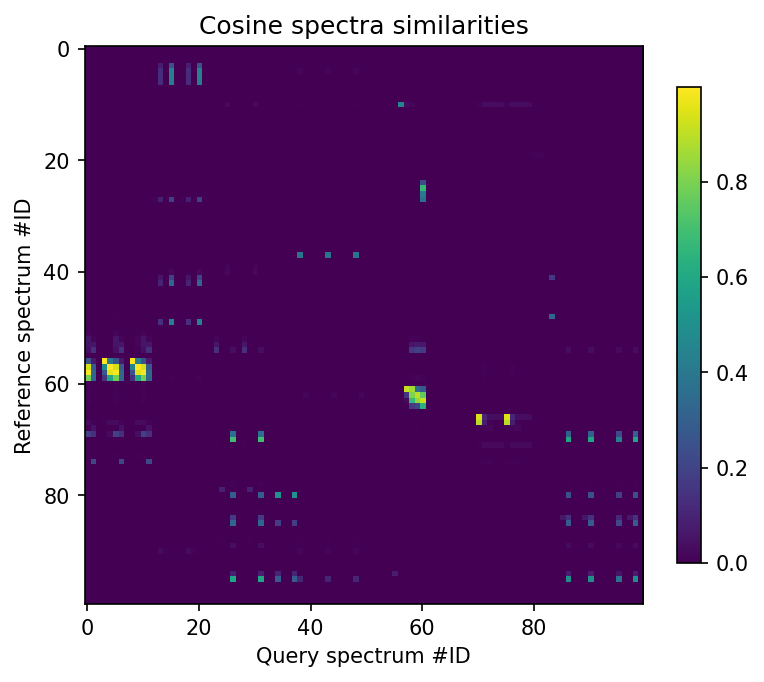

In [13]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(cosine_scores.scores[200:300, 200:300]["score"], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Cosine spectra similarities")
plt.ylabel("Reference spectrum #ID")
plt.xlabel("Query spectrum #ID")

## Modified cosine score

In [14]:
similarity_measure = ModifiedCosine(tolerance=0.005)
mod_cosine_scores = calculate_scores(reference_spectra, query_spectra, similarity_measure, is_symmetric=False)

In [15]:
query_spectrum_number = 1392

In [16]:
best_matches = mod_cosine_scores.scores_by_query(query_spectra[query_spectrum_number], sort=True)[:10]
[x[1] for x in best_matches]

[(0.93790317, 3),
 (0.9374978, 3),
 (0.93531649, 3),
 (0.92493718, 3),
 (0.92481331, 2),
 (0.31750341, 2),
 (0.31591956, 3),
 (0.31435831, 2),
 (0.3123011, 2),
 (0.29373256, 1)]

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

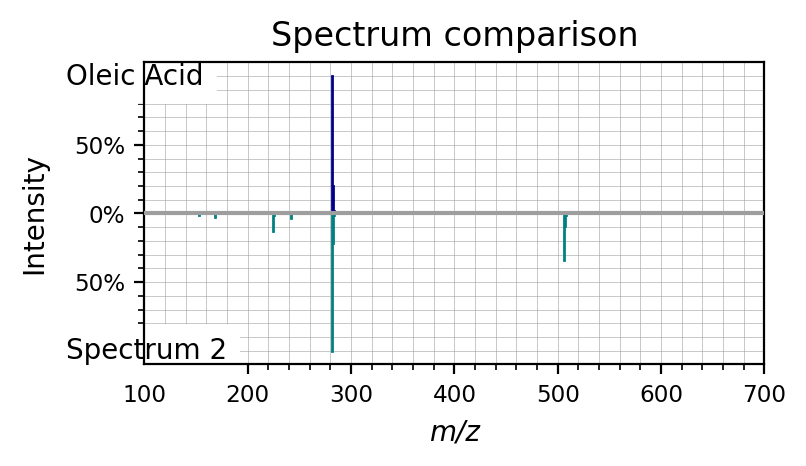

In [17]:
best_matches[0][0].plot_against(query_spectra[query_spectrum_number], label="best match", figsize=(4, 2))

In [18]:
[x[0].get("pccid") for x in best_matches]

['445639',
 '445639',
 '445639',
 '5461071',
 '5461071',
 '1245',
 '445858',
 '1245',
 '1245',
 '5461071']

CCCCCCCC/C=C\CCCCCCCC(=O)O


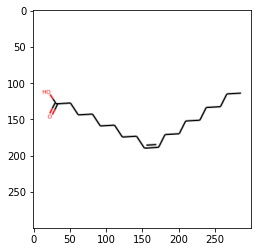

CCCCCCCC/C=C\CCCCCCCC(=O)O


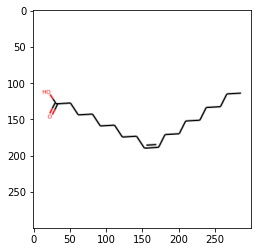

CCCCCCCC/C=C\CCCCCCCC(=O)O


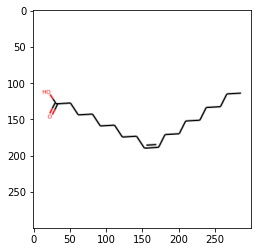

In [19]:
for i, cid in enumerate([x[0].get("pccid") for x in best_matches][:3]):
    smiles = pubchempy.get_compounds(cid, 'cid')[0]
    print(smiles.isomeric_smiles)
    m = Chem.MolFromSmiles(smiles.isomeric_smiles)
    im = Chem.Draw.MolToImage(m)
    plt.imshow(im)
    plt.show()

Text(0.5, 0, 'Query spectrum #ID')

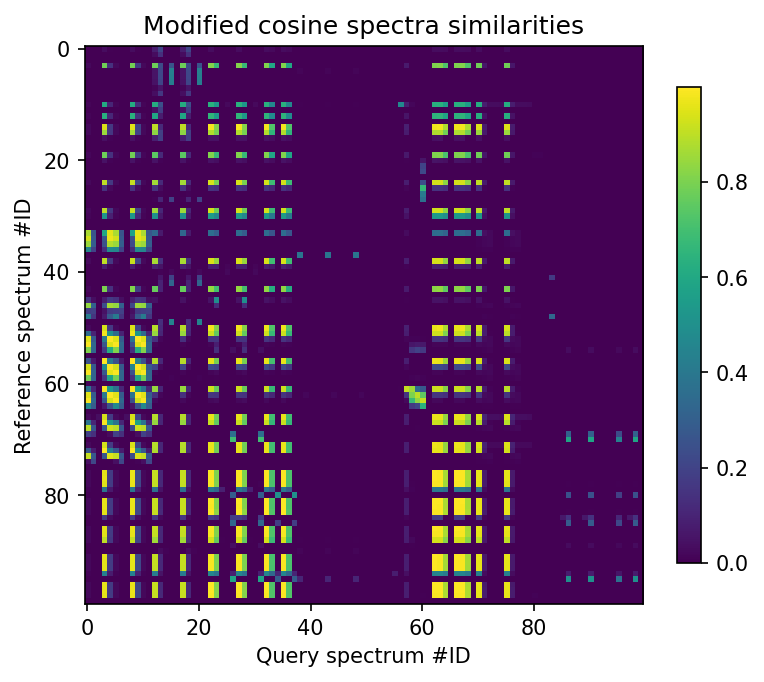

In [20]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(mod_cosine_scores.scores[200:300, 200:300]["score"], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Modified cosine spectra similarities")
plt.ylabel("Reference spectrum #ID")
plt.xlabel("Query spectrum #ID")

## Spec2vec

In [21]:
path_model = "/Users/krv114/Desktop/MS/Similarity comparison/"
filename_model = "spec2vec_AllPositive_ratio05_filtered_201101_iter_15.model"
filename = os.path.join(path_model, filename_model)
model = gensim.models.Word2Vec.load(filename)

In [22]:
spec2vec_similarity = Spec2Vec(model=model,
                               intensity_weighting_power=0.5,
                               allowed_missing_percentage=5.0)

In [23]:
def peak_processing(spectrum):
    spectrum = default_filters(spectrum)
    spectrum = normalize_intensities(spectrum)
    return spectrum

reference_s2v_spectra = [peak_processing(s) for s in reference_spectra]
query_s2v_spectra = [peak_processing(s) for s in query_spectra if len(s.peaks) != 0]

2023-01-16 09:24:34,276:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 319.2280252 with new one: 319.2280252
2023-01-16 09:24:34,281:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 319.2280252 with new one: 319.2280252
2023-01-16 09:24:34,286:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 319.2280252 with new one: 319.2280252
2023-01-16 09:24:34,292:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 319.2280252 with new one: 319.2280252
2023-01-16 09:24:34,298:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 319.2280252 with new one: 319.2280252
2023-01-16 09:24:34,303:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 313.23925153 with new one: 313.23925153
2023-01-16 09:24:34,308:WARNING:matchms:interpret_pepmass:Overwriting existing precursor_mz 313.23925153 with new one: 313.23925153
2023-01-16 09:24:34,313:WARNING:matchms:interpret_pepmass:Overwriting existing precurs

In [24]:
spec2vec_scores = calculate_scores(reference_s2v_spectra, query_s2v_spectra, spec2vec_similarity,
                          is_symmetric=False)

2023-01-16 09:24:54,136:WARNING:spec2vec:vector_operations:('Missing percentage (13.41%) is above set maximum. An empty vector will be returned.', 'Consider retraining the used model or change the `allowed_missing_percentage`.')
2023-01-16 09:24:54,138:WARNING:spec2vec:vector_operations:('Missing percentage (9.43%) is above set maximum. An empty vector will be returned.', 'Consider retraining the used model or change the `allowed_missing_percentage`.')


In [25]:
query_spectrum_number = 1392

In [26]:
best_matches_w_nan = spec2vec_scores.scores_by_query(query_s2v_spectra[query_spectrum_number], sort=True)
best_matches = list(compress(best_matches_w_nan, ~np.isnan([x[1] for x in best_matches_w_nan])))[:10]
[x[1] for x in best_matches]

[0.7799716374624497,
 0.7789097541932403,
 0.6569310712592438,
 0.612693121992293,
 0.557199421535603,
 0.20805642144689895,
 0.1961584078466854,
 0.19451881367796509,
 0.19395689969075616,
 0.19273548431355905]

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

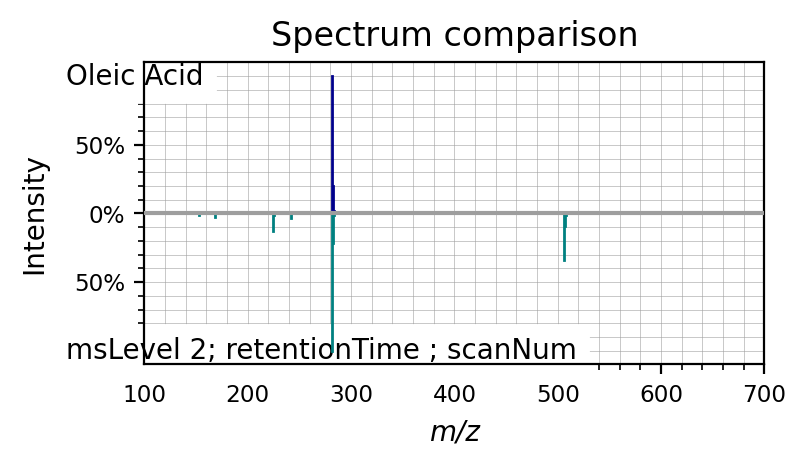

In [27]:
best_matches[0][0].plot_against(query_s2v_spectra[query_spectrum_number], label="best match", figsize=(4, 2))

In [28]:
[x[0].get("pccid") for x in best_matches]

['445639',
 '445639',
 '445639',
 '5461071',
 '5461071',
 '5282768',
 '5281',
 '5282768',
 '547',
 '11427']

CCCCCCCC/C=C\CCCCCCCC(=O)O


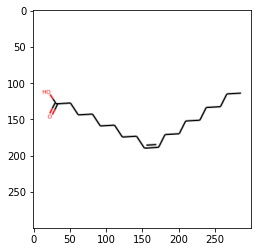

CCCCCCCC/C=C\CCCCCCCC(=O)O


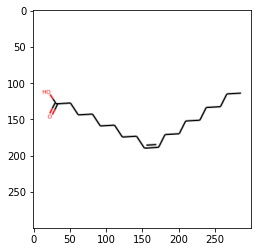

CCCCCCCC/C=C\CCCCCCCC(=O)O


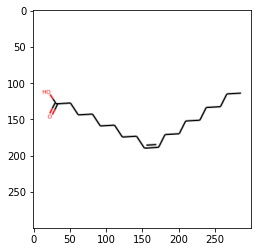

In [29]:
for i, cid in enumerate([x[0].get("pccid") for x in best_matches][:3]):
    smiles = pubchempy.get_compounds(cid, 'cid')[0]
    print(smiles.isomeric_smiles)
    m = Chem.MolFromSmiles(smiles.isomeric_smiles)
    im = Chem.Draw.MolToImage(m)
    plt.imshow(im)
    plt.show()

Text(0.5, 0, 'Query spectrum #ID')

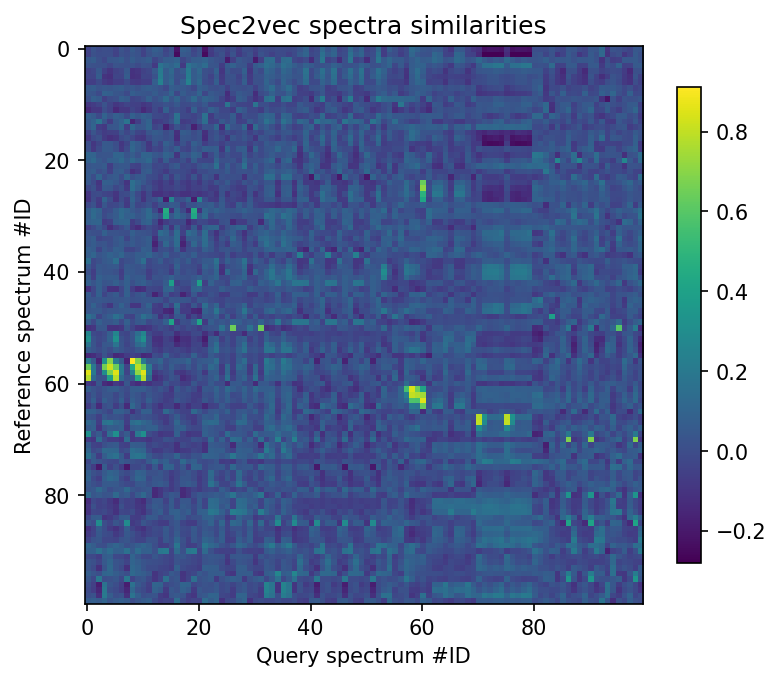

In [30]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(spec2vec_scores.scores[200:300, 200:300], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Spec2vec spectra similarities")
plt.ylabel("Reference spectrum #ID")
plt.xlabel("Query spectrum #ID")

## GNPS output

In [31]:
path_data = "/Users/krv114/Desktop/MS/Similarity comparison/conference_2023"
file_GNPS_output = os.path.join(path_data, "GNPS_output_neg.tsv")
GNPS_output = pd.read_csv(file_GNPS_output, sep="\t")

In [32]:
cids = []; scans = []; mqscores = []; shared_peaks = []
for _, row in GNPS_output.iterrows():
    try:
        if pd.isnull(row['Smiles']):
            if pd.isnull(row['Pubmed_ID']):
                continue
            cid = int(row['Pubmed_ID'])
            cids.append(cid)
        else:
            cid = pubchempy.get_compounds(row['Smiles'], 'smiles')[0]
            cids.append(cid.cid)
        scans.append(row['#Scan#'])
        mqscores.append(row['MQScore'])
        shared_peaks.append(row['SharedPeaks'])
    except:
        continue

gnps_output = pd.DataFrame(
    {
        "cid": cids,
        "Scan": scans,
        "MQscores": mqscores,
        "SharedPeaks": shared_peaks
    }
    )

gnps_output

,cid,Scan,MQscores,SharedPeaks
0,12544,1165,0.968271,6
1,12544,1175,0.968271,6
2,12310288,1164,0.951760,8
3,12310288,1174,0.951760,8
4,4516974,1245,0.932994,7
5,4516974,1250,0.932994,7
6,755,1215,0.914661,13
7,755,1210,0.914661,13
8,755,1205,0.914661,13
9,688,1582,0.912134,6


In [48]:
ref_ids = []
for i, s in enumerate(reference_spectra):
    if int(s.get("pccid")) in list(gnps_output['cid']):
        ref_ids.append([s, int(s.get("pccid"))])
        #ref_ids.append(int(s.get("pccid")))

In [57]:
pccids_in_library = list(set([ref_id[1] for ref_id in ref_ids]))
pccids_in_library

[12544,
 6305,
 10690,
 444899,
 5699,
 5192,
 443210,
 1198,
 12310288,
 3035026,
 10258,
 16500,
 11976122]

In [55]:
matched_reference_spectra = [ref_id for ref_id in ref_ids if ref_id[1] == 444899]

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

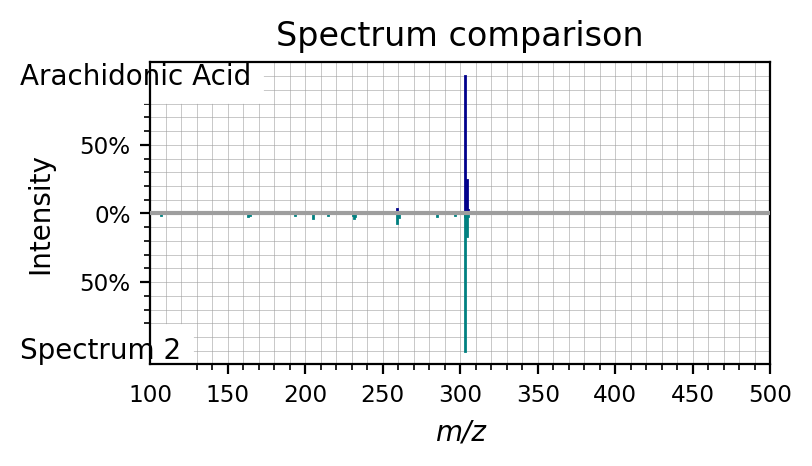

In [61]:
matched_reference_spectra[0][0].plot_against(query_spectra[614 - 1], label="best match", figsize=(4, 2))

## Scoring stuff

#### Cosine similarity

In [62]:
cutoff = 0.7

cos_query_matches_to_keep = []
for spec_num, s in enumerate(query_spectra):
    best_match = cosine_scores.scores_by_query(s, sort=True)[0]
    if best_match[1][0] >= cutoff:
        cos_query_matches_to_keep.append(spec_num)
cos_reference_matches_to_keep = []
for spec_num, s in enumerate(reference_spectra):
    best_match = cosine_scores.scores_by_reference(s, sort=True)[0]
    if best_match[1][0] >= cutoff:
        cos_reference_matches_to_keep.append(spec_num)
cosine_scores.scores[cos_reference_matches_to_keep, :][:, cos_query_matches_to_keep]

array([[(0., 0), (0., 0), (0., 0), ..., (0., 0), (0., 0), (0., 0)],
       [(0., 0), (0., 0), (0., 0), ..., (0., 0), (0., 0), (0., 0)],
       [(0., 0), (0., 0), (0., 0), ..., (0., 0), (0., 0), (0., 0)],
       ...,
       [(0., 0), (0., 0), (0., 0), ..., (0., 0), (0., 0), (0., 0)],
       [(0., 0), (0., 0), (0., 0), ..., (0., 0), (0., 0), (0., 0)],
       [(0., 0), (0., 0), (0., 0), ..., (0., 0), (0., 0), (0., 0)]],
      dtype=[('score', '<f8'), ('matches', '<i8')])

Text(0.5, 0, 'Query spectrum [pos in red matrix]')

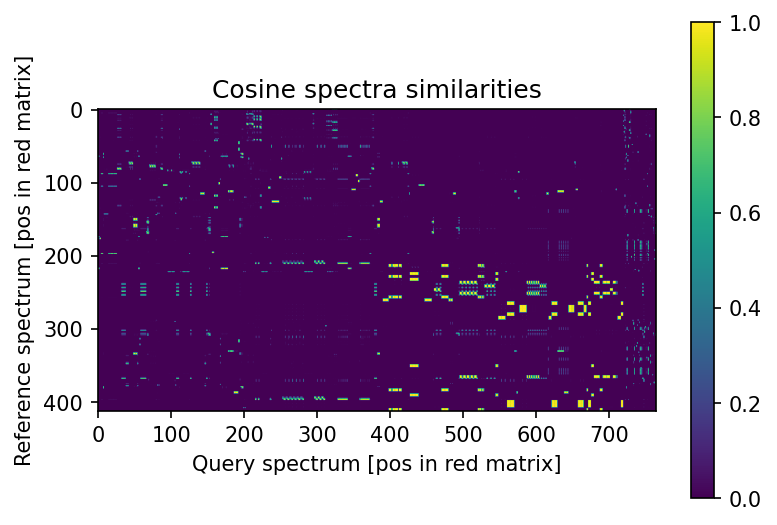

In [63]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(cosine_scores.scores[cos_reference_matches_to_keep, :][:, cos_query_matches_to_keep]["score"], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Cosine spectra similarities")
plt.ylabel("Reference spectrum [pos in red matrix]")
plt.xlabel("Query spectrum [pos in red matrix]")

#### Modified cosine similarity

In [64]:
cutoff = 0.7

mod_cos_query_matches_to_keep = []
for spec_num, s in enumerate(query_spectra):
    best_match = mod_cosine_scores.scores_by_query(s, sort=True)[0]
    if best_match[1][0] >= cutoff:
        mod_cos_query_matches_to_keep.append(spec_num)
mod_cos_reference_matches_to_keep = []
for spec_num, s in enumerate(reference_spectra):
    best_match = mod_cosine_scores.scores_by_reference(s, sort=True)[0]
    if best_match[1][0] >= cutoff:
        mod_cos_reference_matches_to_keep.append(spec_num)
mod_cosine_scores.scores[mod_cos_reference_matches_to_keep, :][:, mod_cos_query_matches_to_keep]

array([[(8.24254622e-03,  1), (8.75492246e-01,  1), (8.75492246e-01,  1),
        ..., (9.12131859e-01, 13), (9.09333064e-01,  8),
        (2.57595220e-03,  3)],
       [(0.00000000e+00,  0), (9.71532625e-01,  1), (9.71532625e-01,  1),
        ..., (9.97605582e-01, 16), (9.95190598e-01, 10),
        (0.00000000e+00,  0)],
       [(0.00000000e+00,  0), (0.00000000e+00,  0), (0.00000000e+00,  0),
        ..., (8.47403961e-01,  7), (8.45917241e-01,  7),
        (0.00000000e+00,  0)],
       ...,
       [(0.00000000e+00,  0), (9.69323215e-01,  1), (9.69323215e-01,  1),
        ..., (9.97872396e-01, 10), (9.95538225e-01,  9),
        (9.00704490e-06,  1)],
       [(0.00000000e+00,  0), (9.59104175e-01,  1), (9.59104175e-01,  1),
        ..., (9.95575128e-01,  7), (9.92862960e-01,  8),
        (2.59348512e-05,  1)],
       [(0.00000000e+00,  0), (9.74776149e-01,  1), (9.74776149e-01,  1),
        ..., (9.97492435e-01,  2), (9.95525728e-01,  2),
        (0.00000000e+00,  0)]],
      dtype=[('

Text(0.5, 0, 'Query spectrum [pos in red matrix]')

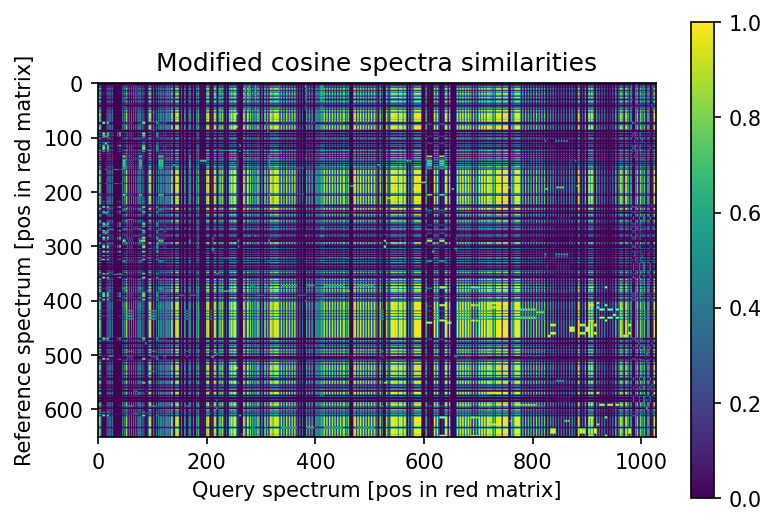

In [65]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(mod_cosine_scores.scores[mod_cos_reference_matches_to_keep, :][:, mod_cos_query_matches_to_keep]["score"], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Modified cosine spectra similarities")
plt.ylabel("Reference spectrum [pos in red matrix]")
plt.xlabel("Query spectrum [pos in red matrix]")

#### Spec2vec

In [66]:
cutoff = 0.7

s2v_query_matches_to_keep = []
for spec_num, s in enumerate(query_s2v_spectra):
    best_matches_w_nan = spec2vec_scores.scores_by_query(s, sort=True)
    try:
        best_match = list(compress(best_matches_w_nan, ~np.isnan([x[1] for x in best_matches_w_nan])))[0]
        if best_match[1] >= cutoff:
            s2v_query_matches_to_keep.append(spec_num)
    except IndexError:
        continue
s2v_reference_matches_to_keep = []
for spec_num, s in enumerate(reference_s2v_spectra):
    best_matches_w_nan = spec2vec_scores.scores_by_reference(s, sort=True)
    try:
        best_match = list(compress(best_matches_w_nan, ~np.isnan([x[1] for x in best_matches_w_nan])))[0]
        if best_match[1] >= cutoff:
            s2v_reference_matches_to_keep.append(spec_num)
    except IndexError:
        continue
spec2vec_scores.scores[s2v_reference_matches_to_keep, :][:, s2v_query_matches_to_keep]

array([[-0.04010932, -0.04010932,  0.07613485, ...,  0.08912576,
         0.14305881, -0.0174883 ],
       [ 0.01538695,  0.01538695, -0.00969858, ..., -0.11393958,
        -0.0802738 , -0.02428837],
       [ 0.05496822,  0.05496822, -0.02504415, ..., -0.12370976,
        -0.10835914, -0.00093507],
       ...,
       [-0.02303924, -0.02303924,  0.00317888, ...,  0.07286074,
         0.03164565, -0.09146933],
       [-0.00510598, -0.00510598,  0.02550821, ...,  0.08426888,
         0.00110846, -0.08228924],
       [ 0.00402672,  0.00402672,  0.01318844, ...,  0.08759193,
         0.01853469, -0.07320826]])

Text(0.5, 0, 'Query spectrum [pos in red matrix]')

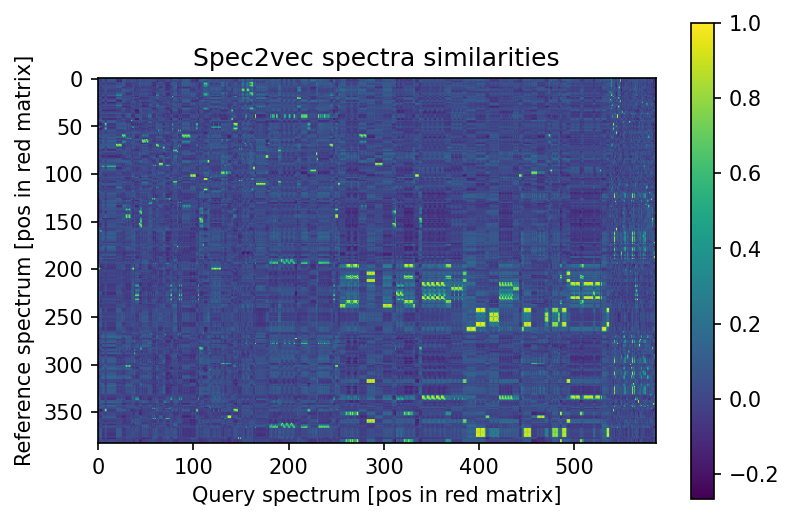

In [67]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(spec2vec_scores.scores[s2v_reference_matches_to_keep, :][:, s2v_query_matches_to_keep], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Spec2vec spectra similarities")
plt.ylabel("Reference spectrum [pos in red matrix]")
plt.xlabel("Query spectrum [pos in red matrix]")

## Write a new similarity measure!

In [68]:
import numpy as np
from matchms.typing import SpectrumType
from matchms.similarity.BaseSimilarity import BaseSimilarity

In [69]:
class CustomSimilarity(BaseSimilarity):
    """Inherit the BaseSimilarity class to make use of predefined parameters
    """

    def __init__(self, scaling: float = 1.0):
        """Constructor. Here, function parameters are defined.
        Commonly used are scaling factors and tolerances

        Parameters
        ----------
        scaling
            Scale scores to maximum possible score being 'scaling'.
        """
        self.scaling = scaling

    def pair(self, reference: SpectrumType, query: SpectrumType) -> float:
        """This will calculate the similarity score between two spectra."""
        mz_ref = set(reference.peaks.mz)
        mz_query = set(query.peaks.mz)
        intersected = mz_query.intersection(mz_ref)
        unioned = mz_query.union(mz_ref)

        if len(unioned) == 0:
            return 0

        return np.float64(self.scaling * len(intersected) / len(unioned))

Test it out!

In [70]:
similarity_measure = CustomSimilarity(scaling=1.0)
custom_scores = calculate_scores(reference_spectra, query_spectra, similarity_measure, is_symmetric=False)

In [71]:
custom_scores.scores

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 0, 'Query spectrum #ID')

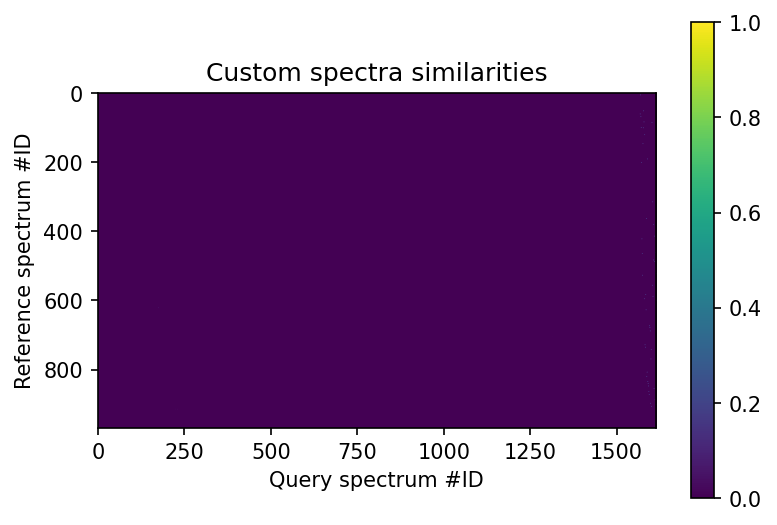

In [72]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(custom_scores.scores, cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Custom spectra similarities")
plt.ylabel("Reference spectrum #ID")
plt.xlabel("Query spectrum #ID")

In [73]:
cutoff = 0.1

custom_query_matches_to_keep = []
for spec_num, s in enumerate(query_spectra):
    best_match = custom_scores.scores_by_query(s, sort=True)[0]
    if best_match[1] >= cutoff:
        custom_query_matches_to_keep.append(spec_num)
custom_reference_matches_to_keep = []
for spec_num, s in enumerate(reference_spectra):
    best_match = custom_scores.scores_by_reference(s, sort=True)[0]
    if best_match[1] >= cutoff:
        custom_reference_matches_to_keep.append(spec_num)
custom_scores.scores[custom_reference_matches_to_keep, :][:, custom_query_matches_to_keep]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14285714, 0.14285714, ..., 0.        , 0.        ,
        0.        ]])

Text(0.5, 0, 'Query spectrum [pos in red matrix]')

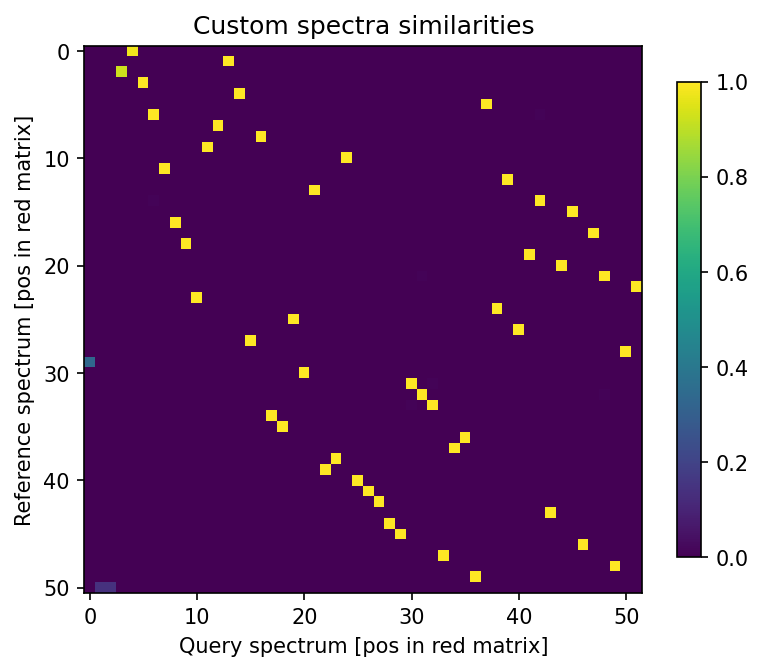

In [74]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(custom_scores.scores[custom_reference_matches_to_keep, :][:, custom_query_matches_to_keep], cmap="viridis")
plt.colorbar(shrink=0.7)
plt.title("Custom spectra similarities")
plt.ylabel("Reference spectrum [pos in red matrix]")
plt.xlabel("Query spectrum [pos in red matrix]")